In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import pickle
import os
sns.set()
workdir = os.path.dirname(os.getcwd())
srcdir = os.getcwd()
datadir = workdir + '/data/'
outputdir = workdir + '/output/'
docdir = workdir + '/doc/'

obs_series = pd.read_csv(datadir + 'data.csv', delimiter=',')
obs_series = np.array(obs_series.iloc[:,1:]).T

T = obs_series.shape[1]
N = 100_000
batch_num = 135

θ_name = ['λ', 'η', \
        'b11', 'b22', \
        'As11', 'As12', 'As13',\
        'As21', 'As22', 'As23', 'Aso2', \
        'As31', 'As32', 'As33', 'Aso3', \
        'Bs11', 'Bs21', 'Bs22', 'Bs31', 'Bs32', 'Bs33',\
        'j21',  'j31',  'j32']

In [2]:
def return_dir(seed):
    case = 'actual data, seed = ' + str(seed) + ', T = ' + str(T) + ', N = ' + str(N)
    return outputdir + case  + '/'

casedir = []
for i in range(batch_num):
    casedir.append(return_dir(i))

In [4]:
t = 282
θ_final = []
success_seed = []
for i in tqdm(range(1,batch_num)):
    try:
        with open(casedir[i] + 'θ_'+str(t)+'.pkl', 'rb') as f:
            θ_final.append(pickle.load(f))
        success_seed.append(i)
    except:
        pass

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 134/134 [02:37<00:00,  1.18s/it]


In [9]:
def return_coll(θ_final):
    λ_particle = []; η_particle = []; b11_particle = []; b22_particle = []
    As11_particle = []; As12_particle = []; As13_particle = []; 
    As21_particle = []; As22_particle = []; As23_particle = []; Aso2_particle = []
    As31_particle = []; As32_particle = []; As33_particle = []; Aso3_particle = []
    Bs11_particle = []; Bs21_particle = []; Bs22_particle = []; Bs31_particle = []; Bs32_particle = []; Bs33_particle = []
    j21_particle = []; j31_particle = []; j32_particle = [];
    λ_iter_particle = []; Ass_iter_particle = []

    for n in range(N):
        λ_particle.append(θ_final[n][1][1,1])
        η_particle.append(θ_final[n][0][1,0])
        b11_particle.append(θ_final[n][2][0,0])
        b22_particle.append(θ_final[n][2][1,1])
        As11_particle.append(θ_final[n][4][0,0])
        As12_particle.append(θ_final[n][4][0,1])
        As13_particle.append(θ_final[n][4][0,2])
        As21_particle.append(θ_final[n][4][1,0])
        As22_particle.append(θ_final[n][4][1,1])
        As23_particle.append(θ_final[n][4][1,2])
        Aso2_particle.append(θ_final[n][3][1,0])
        As31_particle.append(θ_final[n][4][2,0])
        As32_particle.append(θ_final[n][4][2,1])
        As33_particle.append(θ_final[n][4][2,2])
        Aso3_particle.append(θ_final[n][3][2,0])
        Bs11_particle.append(θ_final[n][5][0,0])
        Bs21_particle.append(θ_final[n][5][1,0])
        Bs22_particle.append(θ_final[n][5][1,1])
        Bs31_particle.append(θ_final[n][5][2,0])
        Bs32_particle.append(θ_final[n][5][2,1])
        Bs33_particle.append(θ_final[n][5][2,2])
        j21_particle.append(θ_final[n][6][1,0])
        j31_particle.append(θ_final[n][6][2,0])
        j32_particle.append(θ_final[n][6][2,1])
        λ_iter_particle.append(θ_final[n][7])
        Ass_iter_particle.append(θ_final[n][7])

    θ_coll = [λ_particle, η_particle, b11_particle, b22_particle, \
              As11_particle, As12_particle, As13_particle,\
              As21_particle, As22_particle, As23_particle, Aso2_particle,\
              As31_particle, As32_particle, As33_particle, Aso3_particle,\
              Bs11_particle, Bs21_particle, Bs22_particle, Bs31_particle, Bs32_particle, Bs33_particle,\
              j21_particle, j31_particle, j32_particle]
    return θ_coll

θ_coll = []
indexes = []
for i in tqdm(range(len(θ_final))):
    θ_coll.append(return_coll(θ_final[i]))
    indexes.append('seed = '+str(success_seed[i]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [01:30<00:00,  1.22it/s]


In [23]:
θ_all = []
for i in range(len(θ_name)):
    θ_t = []
    for θs in tqdm(θ_coll):
        θ_t = θ_t + θs[i]
    θ_all.append(θ_t)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [05:21<00:00,  2.90s/it]


In [26]:
plot_series = []
for i in tqdm(range(len(θ_name))):
    plot_series.append(pd.DataFrame(θ_all[i]).T)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [08:32<00:00, 21.35s/it]


In [ ]:
period = t
fig, axes = plt.subplots(6,4,figsize = (15,10))
for v, ax in tqdm(enumerate(axes.flatten())):
    sns.kdeplot(data = plot_series[v], ax = ax)
    ax.set_title(θ_name[v])
    if v !=0:
        ax.get_legend().remove()

0it [00:00, ?it/s]/Users/haominqin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


In [32]:
for i in tqdm(range(len(θ_all))): 
    with open(outputdir + 'θ_all_' + str(i) + '.pkl', 'wb') as f:
            pickle.dump(θ_all[i], f)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [38:42<00:00, 96.78s/it]


24it [34:44, 86.85s/it]


CPU times: user 11min 57s, sys: 14min 30s, total: 26min 28s
Wall time: 34min 45s


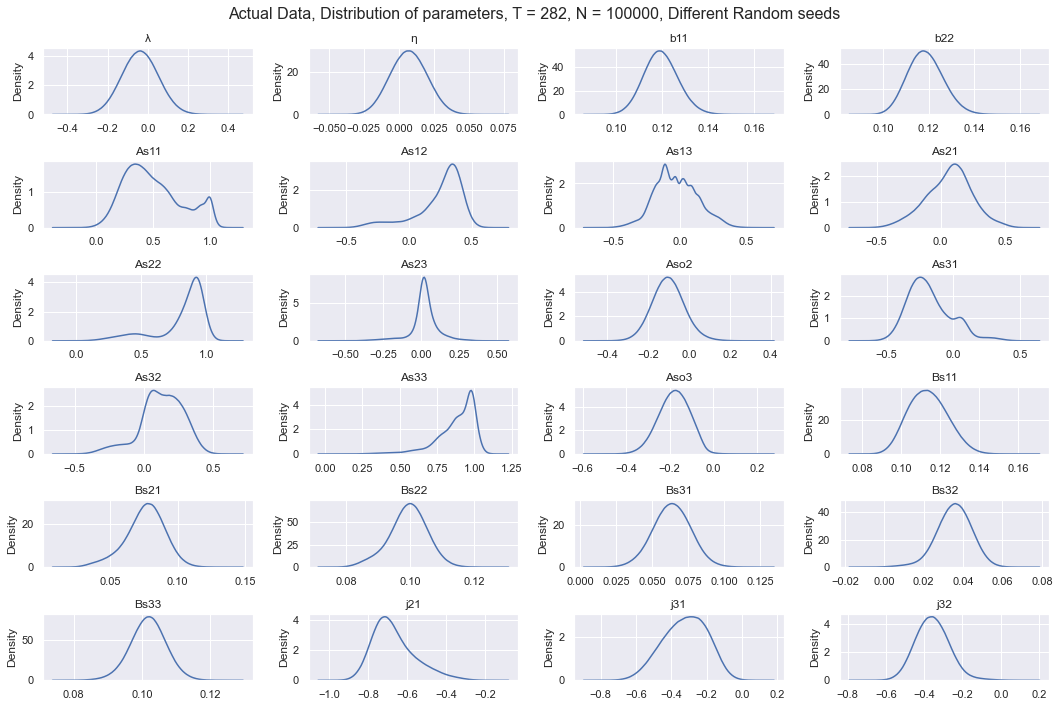

In [48]:
%%time
period = t
fig, axes = plt.subplots(6,4,figsize = (15,10))
for v, ax in tqdm(enumerate(axes.flatten())):
    sns.kdeplot(data = θ_all[v][0:10_000_000], ax = ax)
    ax.set_title(θ_name[v])
title = 'Actual Data, Distribution of parameters, T = '+ str(period)+', N = '+str(N)+', Different Random seeds'
fig.suptitle(title, fontsize=16)    
fig.tight_layout()
# fig.savefig(docdir + title + '.png',dpi = 400, bbox_inches = "tight")

In [50]:
title = '100 Different Random seeds, Aggregate Distribution of parameters, T = '+ str(period)+', N = '+str(N)
fig.suptitle(title, fontsize=16)    
fig.tight_layout()
fig.savefig(docdir + title + '.png',dpi = 400, bbox_inches = "tight")